# Simple example of modelling of a growth units

In this notebook, a simple modelling scenario is presented where the growth of a growth unit is modelled by simulating the growth of its internodes and leaves using a logistic function. Leaves and internodes growth parameters will depends on their ranks. The elements of the modelling scenario (the growth function, the parameters, the rules for the 3D architecture) are presented sequentially to present the different aspect of the model in a didactic way.

FSPM2020 Frédéric Boudon

In [1]:
import pgljupyter

# Growth 

Growth of organs is simulated using a logistic function (Cookson et al., 2007).

<center>$\frac{L}{1 + \exp{-\frac{t-tip}{b}}}$</center>

In [2]:
from math import exp

def growth_logistic(ttime, finalsize, tip, b):
    return finalsize / (1 + exp(-(ttime-tip)/b ))

Cookson et al. 2007, Annals of Botany 99(4) 703–711.

### Definition of growth parameters for the different organs along the axis

In [3]:
LLeaf = [4.9, 5.5, 6., 6.9, 7.5, 8.7, 9.2, 9.6, 7.]
tipLeaf = [0.0, 1.8, 3.7, 5.5, 7.1, 8.8, 10.4, 11.9, 13.4]
bLeaf = 1.7 

LIn = [1., 1.2, 1.8, 2.7, 3.5, 4.2, 4.2, 3.5, 1.7]
tipIn = [0.2, 1.9, 3.5, 5.1, 6.7, 8.4, 10.0, 11.6, 13.3]
bIn = 1.3

nbMetamers = len(LLeaf)
maxTime = 25
dt = 0.1

leaf_size = lambda i, t: growth_logistic(t, LLeaf[i], tipLeaf[i], bLeaf)
internode_size = lambda i, t: growth_logistic(t, LIn[i], tipIn[i], bIn)

### Plot of the final sizes of leaves and internodes along the main axis

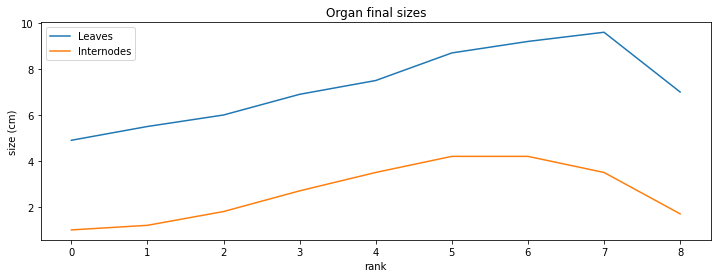

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(LLeaf,label='Leaves')
plt.plot(LIn, label = 'Internodes')
plt.xlabel('rank');plt.ylabel('size (cm)')
plt.title('Organ final sizes');plt.legend()
plt.show()

### Growth kinetics of the different leaves

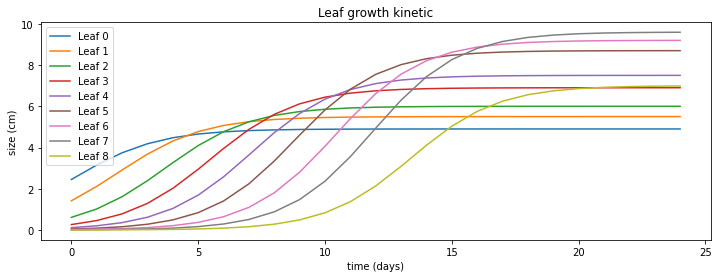

In [5]:
from matplotlib.colors import to_rgb
plt.figure(figsize=(12,4))
timerange = range(0,maxTime)
colors = []
for i in range(nbMetamers):
    colors.append(plt.plot(timerange,[leaf_size(i,t) for t in timerange], 
                           label='Leaf '+str(i)))
# retrieve the colors of each lines
colors = list(map(lambda c : [int(cv*255) for cv in to_rgb(c[0].get_color())],colors))
plt.xlabel('time (days)');plt.ylabel('size (cm)');
plt.title('Leaf growth kinetic'); plt.legend()
plt.show()

# The Architectural model defined using Lsystem rules

In [6]:
%%lpy -a True -u dm -w 4 -s 600,400
Axiom: 
    nproduce _(0.3)@Gc SetColor(Material((1,15,1),diffuse=10,specular=(0,0,0)))
    for i in range(nbMetamers): nproduce I(i,0)/(137)[[&(40)L(i,0)]]
    nproduce I(i,0) @O

derivation length: int(maxTime//dt)
production:
I(i,t) --> I(i,t+dt)
L(i,t) --> L(i,t+dt)
interpretation:
I(i,t) --> F(internode_size(i,t))
L(i,t) :
    l = leaf_size(i,t)
    nproduce SetColor(colors[i][0],colors[i][1],colors[i][2])_(0.1)&(t)F(l/6)[+(90)/(-30)~l(l/2)][-(90)/(30)~l(l/2)]F(l/6)[+(60)/(-15)~l(l/2)][-(60)/(15)~l(l/2)]F(l/6)^(20)~l(l/2)

LsystemWidget(animate=True, derivationLength=250, is_magic=True, scene={'data': b'x\xda\xad\x99\x0bT\x14\xd7\x…

Rules are based on parameters and functions defined on previous cells. 3D display is automatically displayed. Buttons allow to navigate in the different steps of the simulation.